In [1]:
from itertools import count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL.ImageColor import colormap
from pandas.core.dtypes.inference import is_bool
from pywin.framework.interact import formatInput


import datetime
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dai\Downloads\tips.csv")
df

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


# **Groupby**

In [3]:
x=df.groupby('gender')
list(x)[1][1]


,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,2.131400e+14,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2.223730e+15,Sun5985
...,...,...,...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3.543680e+15,Sat5032
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4.284720e+15,Sat2929
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880


In [4]:
x=df.groupby(['gender','day']).agg({'tip':['mean','sum','min','max']}).reset_index()
x


gender   day       tip                     
                     mean     sum   min    max
0  Female   Fri  2.781111   25.03  1.00   4.30
1  Female   Sat  2.801786   78.45  1.00   6.50
2  Female   Sun  3.367222   60.61  1.01   5.20
3  Female  Thur  2.575625   82.42  1.25   5.17
4    Male   Fri  2.693000   26.93  1.50   4.73
5    Male   Sat  3.083898  181.95  1.00  10.00
6    Male   Sun  3.220345  186.78  1.32   6.50
7    Male  Thur  2.980333   89.41  1.44   6.70

# MS Dhonir Record

In [5]:
df = pd.read_csv(r"C:\Users\dai\Downloads\MS_Dhoni_ODI_Record.csv")


In [6]:
print(df.head())
df.head()

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [7]:
# df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df['opposition'] = df['opposition'].str.replace('v ','',regex = False)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [8]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df['year'] = df['date'].dt.year.astype(int)

In [9]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)

In [10]:
#drop unnecesary col
df.drop(columns='odi_number',inplace = True)

In [11]:
# remove unnecessary rows having unnecessary values
df_new = df.loc[((df['score']!='DNB') & (df['score']!='TDNB')),'runs_scored':]

In [12]:
# df
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [13]:
#fixing the data type of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['fours'].astype(int)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [14]:
from time import strftime

#career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')
number_of_matches = df.shape[0]
number_of_inns = df_new.shape[0]
not_outs = df_new['not_out'].sum()
runs_scored = df_new['runs_scored'].sum()
balls_faced = df_new['balls_faced'].sum()
career_sr = (runs_scored/balls_faced)*100
career_avg = (runs_scored / (number_of_inns - not_outs))
print(f"{career_avg:.2f}")


'December 23, 2004'

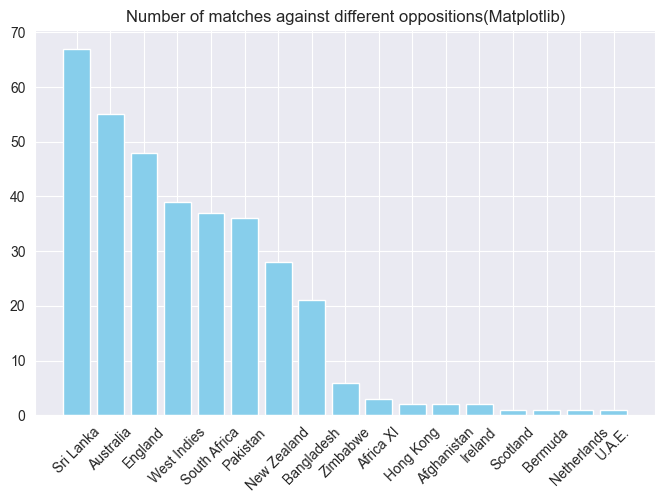

In [19]:
no_of_teams = df['opposition'].nunique()
oppo_counts = df['opposition'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(oppo_counts.index,oppo_counts.values,color = 'skyblue')
plt.title('Number of matches against different oppositions(Matplotlib)')
plt.xticks(rotation =45)
plt.show()

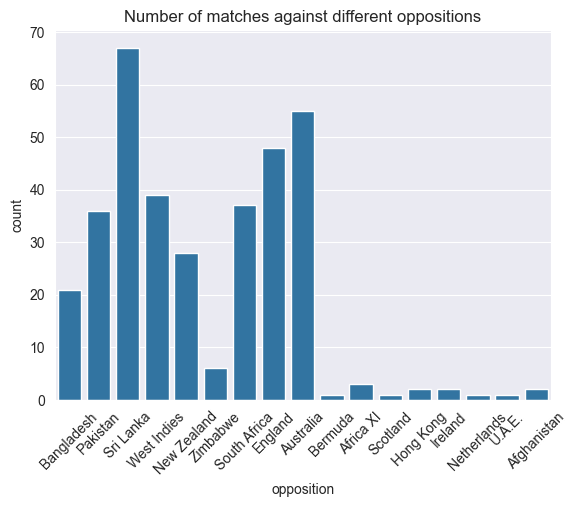

In [23]:
sns.countplot(x = 'opposition',data = df)
plt.title("Number of matches against different oppositions")
plt.xticks(rotation = 45)
plt.show()

In [27]:
#runs_scored_against eah team
sum_of_runs_scored = df_new.groupby('opposition')['runs_scored'].sum()

runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
# plt.figure(figsize=(8,5))
# plt.bar(runs_scored_by_opposition['opposition'],runs_scored_by_opposition['runs_scored'],color='orange')
#plt
#sns
sum_of_runs_scored,runs_scored_by_opposition

(opposition
 Afghanistan       36
 Africa XI        174
 Australia       1660
 Bangladesh       569
 Bermuda           29
 England         1546
 Hong Kong        109
 Ireland           34
 Netherlands       19
 New Zealand      940
 Pakistan        1231
 South Africa     830
 Sri Lanka       2383
 West Indies     1005
 Zimbabwe         208
 Name: runs_scored, dtype: int64,
       opposition  runs_scored
 0    Afghanistan           36
 1      Africa XI          174
 2      Australia         1660
 3     Bangladesh          569
 4        Bermuda           29
 5        England         1546
 6      Hong Kong          109
 7        Ireland           34
 8    Netherlands           19
 9    New Zealand          940
 10      Pakistan         1231
 11  South Africa          830
 12     Sri Lanka         2383
 13   West Indies         1005
 14      Zimbabwe          208)

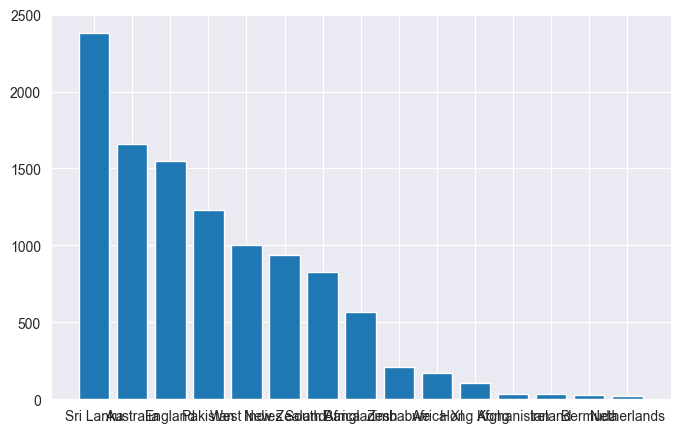

In [28]:
#sorted runs scored
sorted_runs = runs_scored_by_opposition.sort_values(by='runs_scored',ascending = False)
#plt
plt.figure(figsize=(8,5))
plt.bar(sorted_runs['opposition'],sorted_runs['runs_scored'])
plt.show()
#sns

In [29]:
#Filtered_oppositions
opposition_list = ['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by="runs_scored",ascending = False)
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
21,183,145,15,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,15,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,12,12,5,Australia,Mohali,2013-10-19,2013,1
284,134,122,10,10,6,England,Cuttack,2017-01-19,2017,0
146,124,107,9,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...
223,0,4,0,0,0,England,Birmingham,2013-06-23,2013,0
74,0,4,0,0,0,South Africa,Belfast,2007-06-29,2007,0
273,0,3,0,0,0,Australia,Canberra,2016-01-20,2016,0
339,0,1,0,0,0,Australia,Nagpur,2019-03-05,2019,0
